In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import chi2
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [2]:
#load data sets from sklearn

In [97]:
x=datasets.load_iris()

In [95]:
x

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#data framing

In [98]:
df=pd.DataFrame(x.data,columns=x.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [108]:
df["target"]=x.target


In [9]:
#data description

In [109]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
#data info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
#null value check

In [107]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [45]:
#duplicate value check

In [110]:
df.duplicated().sum()

1

In [66]:
#duplicate value remove

In [111]:
df=df.drop_duplicates()

In [112]:
df.duplicated().sum()

0

In [20]:
#boxplot to check outliers

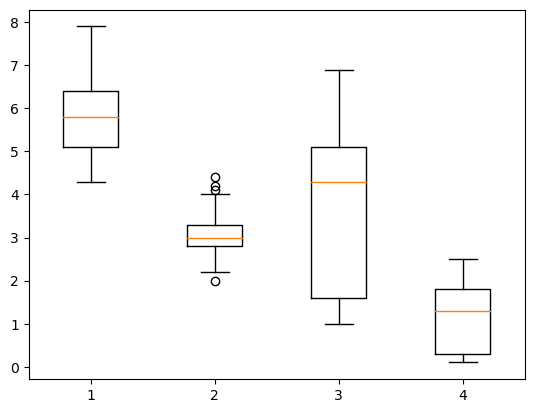

In [113]:
df1=df.drop(['target'],axis=1)
plt.boxplot(df1)
plt.show()

In [22]:
#removing outliers

In [114]:
df1.clip(df1.quantile(0.1),df1.quantile(0.9),axis=1,inplace=True)

<Axes: >

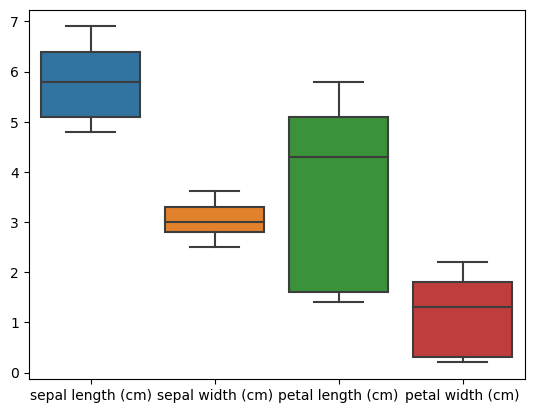

In [115]:
sns.boxplot(df1)

<Axes: >

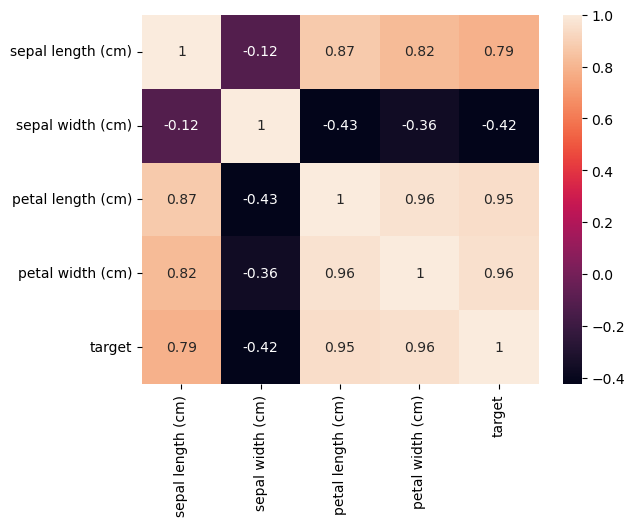

In [116]:
sns.heatmap(df.corr(),annot=True)

In [25]:
# #STANDERLIZATION

#scaler_rob=StandardScaler()

# scaled_data=scaler_rob.fit_transform(df)

# scaled_df=pd.DataFrame(scaled_data,columns=df.columns)


In [26]:
#normalizer

In [27]:
# scaler_rob=Normalizer()

# scaled_data=scaler_rob.fit_transform(df)

# scaled_df=pd.DataFrame(scaled_data,columns=df.columns)


In [28]:
#ROBUST SCALAR

In [29]:
#scaler_rob=RobustScaler()

# scaled_data=scaler_rob.fit_transform(df)

# scaled_df=pd.DataFrame(scaled_data,columns=df.columns)



In [117]:
scaler_rob=MinMaxScaler()

scaled_data=scaler_rob.fit_transform(df1)

scaled_df=pd.DataFrame(scaled_data,columns=df1.columns)


In [118]:
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.142857,0.892857,0.000000,0.00
1,0.047619,0.446429,0.000000,0.00
2,0.000000,0.625000,0.000000,0.00
3,0.000000,0.535714,0.022727,0.00
4,0.095238,0.982143,0.000000,0.00
...,...,...,...,...
144,0.904762,0.446429,0.863636,1.00
145,0.714286,0.000000,0.818182,0.85
146,0.809524,0.446429,0.863636,0.90
147,0.666667,0.803571,0.909091,1.00


<Axes: >

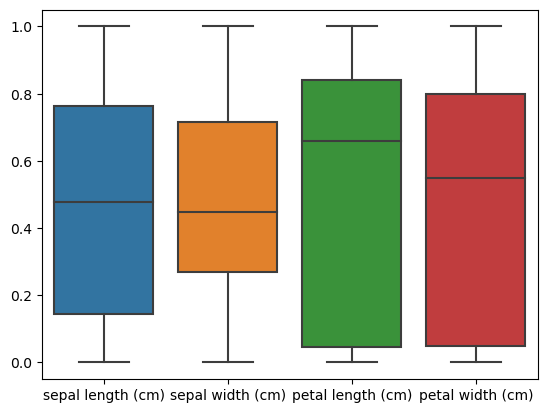

In [119]:
sns.boxplot(scaled_df)

In [ ]:
#information gain

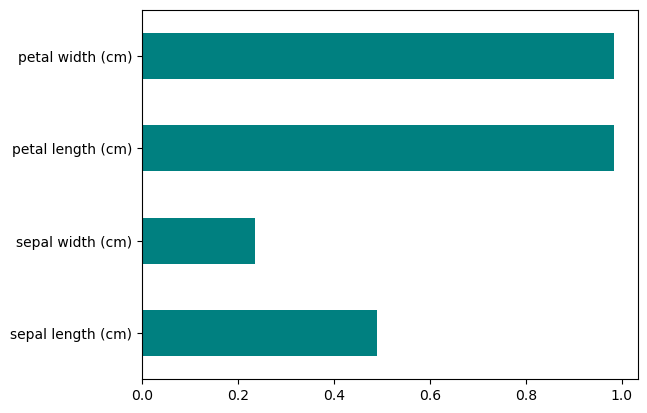

In [145]:
x=df1
y=df["target"]

importance=mutual_info_classif(x,y)
f_importance=pd.Series(importance, df.columns[0:len(df.columns)-1])
f_importance.plot(kind='barh',color='teal')
plt.show()

In [127]:
#chi square


In [139]:
chi2_features = SelectKBest(chi2,k=2)
x_kbest_features=chi2_features.fit_transform(x,y)

print("qriginal : ",x.shape[1])
print("reduced : ",x_kbest_features.shape[1])

qriginal :  4
reduced :  2


In [140]:
selected_features = df.columns[:-1][chi2_features.get_support()] 
print(selected_features)

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [136]:
#fisher score

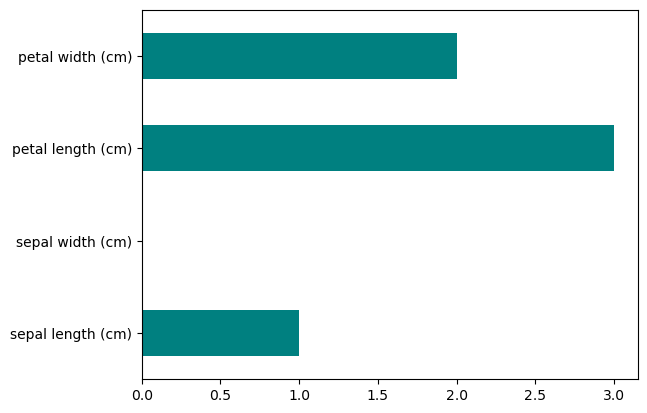

In [153]:
x=np.array(x)
y=np.array(y)
ranks=fisher_score.fisher_score(x,y)

feat_importances=pd.Series(ranks,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color="teal")
plt.show()

In [165]:
#apply knn
#use only selected features
x=df[['petal length (cm)', 'petal width (cm)']]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=40)


In [166]:
k=KNeighborsClassifier(n_neighbors=5)
k.fit(x_train,y_train)

KNeighborsClassifier()

In [167]:
pred = k.predict(x_test)

In [168]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.98


In [ ]:
#logistic regression if target are 0and 1
#kmeans if we want to make clusters
#regression if target is continous